# Task: Top Cuisines

**LEVEL-1 (TASK-1)

**Determine the top three most common cuisines in the dataset.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.shape

(9551, 21)

In [6]:
print(df.duplicated().sum())

0


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
cuisines_counts = df['Cuisines'].value_counts()

In [10]:
print("Top Three Most Common Cuisines:")
print(cuisines_counts.head(3))

Top Three Most Common Cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


**Calculate the percentage of restaurants that serve each of the top cuisines.

In [12]:
cuisine_counts = df['Cuisines'].value_counts()
top_three_cuisines = cuisine_counts.head(3)

In [13]:
total_restaurants = len(df)
print(total_restaurants)

9542


In [14]:
percentage_of_restaurants = (top_three_cuisines / total_restaurants) * 100

In [15]:
print("Percentage of Restaurants for Each Top Cuisine")
print(percentage_of_restaurants)

Percentage of Restaurants for Each Top Cuisine
Cuisines
North Indian             9.809264
North Indian, Chinese    5.355271
Chinese                  3.709914
Name: count, dtype: float64


# Task: City Analysis

**LEVEL-1 (TASK-2)

**Identify the city with the highest number of restaurants in the dataset.

In [19]:
city_counts = df['City'].value_counts()
city_with_highest_num_restaurants = city_counts.head(1)

In [20]:
print("City with the Highest Number of Restaurants")
print(city_with_highest_num_restaurants)

City with the Highest Number of Restaurants
City
New Delhi    5473
Name: count, dtype: int64


**Calculate the average rating for restaurants in each city.

In [26]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

In [27]:
print("Average Rating for Restaurants in Each City")
print(average_rating_by_city)

Average Rating for Restaurants in Each City
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


**Determine the city with the highest average rating.

In [58]:
city_with_highest_average_rating = average_rating_by_city.idxmax()
highest_average_rating = average_rating_by_city.max()

In [59]:
print("City with the Highest Average Rating:", city_with_highest_average_rating)
print("Highest Average Rating:", highest_average_rating)

City with the Highest Average Rating: Inner City
Highest Average Rating: 4.9


# Task: Price Range Distribution

**LEVEL-1 (TASK-3)

**Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [34]:
import matplotlib.pyplot as plt

In [35]:
print(df['Price range'].value_counts())

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


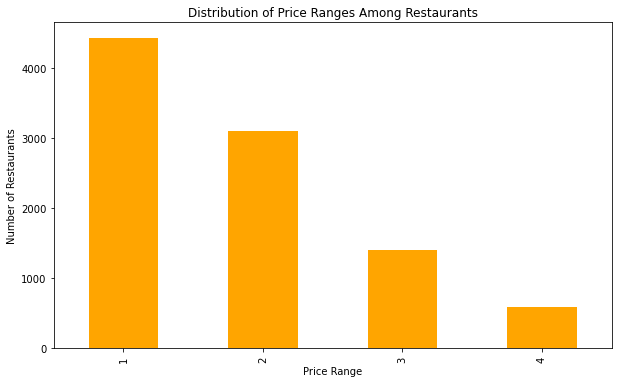

In [36]:
plt.figure(figsize=(10, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

**Calculate the percentage of restaurants in each price range category.

In [42]:
price_range_counts = df['Price range'].value_counts()
total_restaurants = len(df)
print(price_range_counts)
print()
print(total_restaurants)

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

9542


In [43]:
price_range_percentage = (price_range_counts / total_restaurants) * 100

In [44]:
print("Percentage of Restaurants in Each Price Range Category")
print(price_range_percentage)

Percentage of Restaurants in Each Price Range Category
Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: count, dtype: float64


# Task: Online Delivery

**LEVEL-1 (TASK-4)

**Determine the percentage of restaurants that offer online delivery.

In [51]:
online_delivery = df["Has Online delivery"].value_counts().get("Yes")
print(online_delivery)

2451


In [52]:
total_restaurants = len(df)
print(total_restaurants)

9542


In [53]:
online_delivery_percentage = (online_delivery / total_restaurants) * 100
print(online_delivery_percentage)

25.686438901697755


In [54]:
print(round(online_delivery_percentage))

26


**Compare the average ratings of restaurants with and without online delivery.

In [55]:
average_rating_by_online_delivery = df.groupby("Has Online delivery").agg({"Aggregate rating":"mean"})
print(average_rating_by_delivery) 

                     Aggregate rating
Has Online delivery                  
No                           2.463517
Yes                          3.248837
